In [2]:
%pip install geopandas adjustText
%matplotlib inline


Note: you may need to restart the kernel to use updated packages.


In [3]:


from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
from adjustText import adjust_text

In [4]:


from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
from adjustText import adjust_text

# Define the start of a quarter
def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)

# Generate the Ookla Open Data tile URL
def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)
    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_{service_type}_tiles.zip"
    return url




In [5]:
# Fetch Ookla Open Data tiles for Q3 2023
tile_url = get_tile_url("fixed", 2023, 3)
tiles = gp.read_file(tile_url)

# Load global country boundaries dataset
country_url = "https://datahub.io/core/geo-countries/r/countries.geojson"
countries = gp.read_file(country_url)

# Filter for Egypt (ISO_A3: "EGY") and Iraq (ISO_A3: "IRQ")
target_countries = countries[countries['ISO_A3'].isin(['EGY', 'IRQ'])].to_crs(4326)

# Reproject Ookla data to match country boundaries CRS
tiles = tiles.to_crs(target_countries.crs)

# Spatial join to filter Ookla data within Egypt and Iraq
ookla_data = gp.sjoin(tiles, target_countries, how="inner", predicate="intersects")


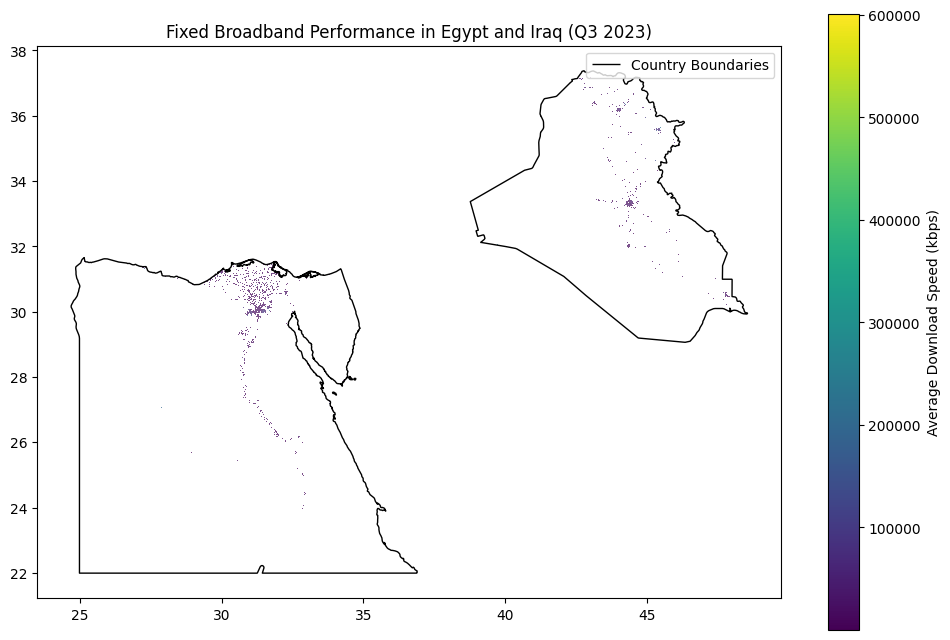

In [6]:
# Visualize Ookla data on the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
target_countries.boundary.plot(ax=ax, color="black", linewidth=1, label="Country Boundaries")
ookla_data.plot(
    ax=ax,
    column="avg_d_kbps",  # Example column for average download speed
    cmap="viridis",
    legend=True,
    legend_kwds={"label": "Average Download Speed (kbps)"},
    alpha=0.7,
)

plt.title("Fixed Broadband Performance in Egypt and Iraq (Q3 2023)")
plt.legend()
plt.show()

In [8]:
ookla_data

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,index_right,ADMIN,ISO_A3,ISO_A2
4412111,1221112333121110,3701,6545,20,3,3,"POLYGON ((42.08862 36.80928, 42.09412 36.80928...",109,Iraq,IRQ,IQ
4412688,1221113203132330,32844,27566,90,4,1,"POLYGON ((42.83569 37.30901, 42.84119 37.30901...",109,Iraq,IRQ,IQ
4412692,1221113203232132,13271,14814,22,4,1,"POLYGON ((42.65991 37.1822, 42.66541 37.1822, ...",109,Iraq,IRQ,IQ
4412693,1221113203232133,16522,15195,28,20,2,"POLYGON ((42.66541 37.1822, 42.6709 37.1822, 4...",109,Iraq,IRQ,IQ
4412694,1221113203232310,13004,12767,8,13,3,"POLYGON ((42.65991 37.17783, 42.66541 37.17783...",109,Iraq,IRQ,IQ
...,...,...,...,...,...,...,...,...,...,...,...
4564520,1230201221310131,932,3859,169,6,4,"POLYGON ((48.46619 29.98349, 48.47168 29.98349...",109,Iraq,IRQ,IQ
4564521,1230201221310311,10820,4676,48,2,2,"POLYGON ((48.46619 29.97397, 48.47168 29.97397...",109,Iraq,IRQ,IQ
4564522,1230201221311203,673,2431,384,6,1,"POLYGON ((48.47717 29.96921, 48.48267 29.96921...",109,Iraq,IRQ,IQ
4564523,1230201221311212,1141,29400,203,3,1,"POLYGON ((48.48267 29.96921, 48.48816 29.96921...",109,Iraq,IRQ,IQ


In [9]:
# Convert speeds to Mbps for easier reading
ookla_data['avg_d_mbps'] = ookla_data['avg_d_kbps'] / 1000
ookla_data['avg_u_mbps'] = ookla_data['avg_u_kbps'] / 1000

ookla_data['avg_d_mbps'] = ookla_data['avg_d_kbps'] / 1000
ookla_data['avg_u_mbps'] = ookla_data['avg_u_kbps'] / 1000

In [10]:
ookla_data.to_csv('ookla_Egypt_Iraq.csv', index=False)

In [13]:
print(tiles.columns)

Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'geometry'],
      dtype='object')


In [11]:
print(target_countries.columns)

Index(['ADMIN', 'ISO_A3', 'ISO_A2', 'geometry'], dtype='object')


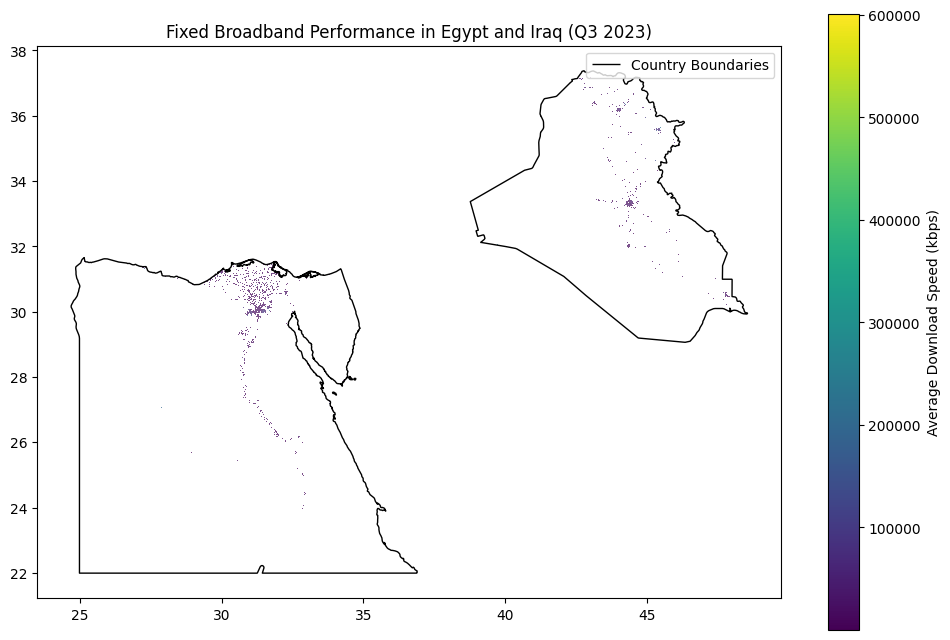

In [14]:
# Fetch Ookla Open Data tiles
tile_url = get_tile_url("fixed", 2023, 3)
tiles = gp.read_file(tile_url)

# Load global country boundaries dataset
country_url = "https://datahub.io/core/geo-countries/r/countries.geojson"
countries = gp.read_file(country_url)

# Filter for Egypt (ISO_A3: "EGY") and Iraq (ISO_A3: "IRQ")
target_countries = countries[countries['ISO_A3'].isin(['EGY', 'IRQ'])].to_crs(4326)

###############
# Reproject Ookla data to match country boundaries CRS
tiles = tiles.to_crs(target_countries.crs)

# Spatial join to filter Ookla data within Egypt and Iraq
ookla_data = gp.sjoin(tiles, target_countries, how="inner", predicate="intersects")

# Visualize Ookla data on the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
target_countries.boundary.plot(ax=ax, color="black", linewidth=1, label="Country Boundaries")
ookla_data.plot(
    ax=ax,
    column="avg_d_kbps",  # Example column for average download speed
    cmap="viridis",
    legend=True,
    legend_kwds={"label": "Average Download Speed (kbps)"},
    alpha=0.7,
)

plt.title("Fixed Broadband Performance in Egypt and Iraq (Q3 2023)")
plt.legend()
plt.show()
##############

# Load U.S. states dataset (TIGER/LINE or equivalent)
us_states_url = "https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip"
us_states = gp.read_file(us_states_url)

# Filter for California (STATEFP: "06")
california = us_states[us_states['STATEFP'] == '06'].to_crs(4326)


In [15]:
# Load U.S. states dataset (TIGER/LINE or equivalent)
us_states_url = "https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip"
us_states = gp.read_file(us_states_url)

# Filter for California (STATEFP: "06")
california = us_states[us_states['STATEFP'] == '06'].to_crs(4326)

In [17]:
# Combine all target regions (Egypt, Iraq, California)
combined_regions = gp.GeoDataFrame(
    pd.concat([ookla_data, california], ignore_index=True),
    crs=target_countries.crs
)

# Perform spatial join: Tiles within Egypt, Iraq, and California
tiles_in_target_regions = gp.sjoin(tiles, combined_regions, how="inner", predicate='intersects')


ValueError: 'index_right' cannot be a column name in the frames being joined